# Scored Images Combiner

In [10]:
import os
import shutil

# The top directory
top_dir = './'  # use the directory we want to start from here

# The destination directory
dest_dir = 'combined_scored_images'

# Create the destination directory if it doesn't exist
if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)

# Initialize the counter
count = 0

# Walk through each directory
for dirpath, dirnames, filenames in os.walk(top_dir):
    # If this directory contains a directory named 'scored_images'
    if 'scored_images' in dirnames:
        # The path to the 'scored_images' directory
        path = os.path.join(dirpath, 'scored_images')
        
        # Get the list of files in the directory
        files = os.listdir(path)
        
        # Iterate through each file
        for file in files:
            # Check if the file is an image
            if file.endswith('.jpg'):
                # Create a path to the file
                src_path = os.path.join(path, file)
                
                # Create a path to the destination
                dst_path = os.path.join(dest_dir, file)
                
                # Copy the file to the destination
                shutil.copy(src_path, dst_path)
                
                # Increment the counter
                count += 1

print("Total jpg files copied: ", count)


Total jpg files copied:  4748


In [1]:
import os
import pandas as pd

# The directory containing the images
dir_name = 'combined_scored_images'

# Get a list of all filenames in the directory
filenames = os.listdir(dir_name)

# Initialize an empty list to store the scores
scores = []

# Iterate through each filename
for filename in filenames:
    # Check if the file is an image
    if filename.endswith('.jpg'):
        # Extract the score (the first three characters of the filename)
        score = filename[:3]
        
        # Add the score to the list
        scores.append({'score': score})

# Convert the list to a DataFrame
scores_df = pd.DataFrame(scores)

# Print the DataFrame
print(scores_df)


     score
0      540
1      427
2      450
3      577
4      574
...    ...
4630   687
4631   497
4632   404
4633   447
4634   590

[4635 rows x 1 columns]


In [2]:
# The directory containing the images
dir_name = 'combined_scored_images'

# Get a list of all filenames in the directory
filenames = os.listdir(dir_name)

# Initialize an empty list to store the data
data = []

# Iterate through each filename
for filename in filenames:
    # Check if the file is an image
    if filename.endswith('.jpg'):
        # Extract the score (the first three characters of the filename)
        score = filename[:3]
        # Extract the locationID (the second part when split by underscores)
        locationID = filename.split('_')[1]
        # Extract the carcassID (the third part when split by underscores, without the '.jpg' at the end)
        carcassID = filename.split('_')[2][:-4]
        # Add the data to the list
        data.append({'score': score, 'locationID': locationID, 'carcassID': carcassID})

# Convert the list to a DataFrame
scores_df = pd.DataFrame(data)

# Print the DataFrame
print(scores_df)

     score locationID carcassID
0      540        ND2      1174
1      427       CDP1       230
2      450        TL2      7594
3      577        TL1      7669
4      574       CFM3  132758-1
...    ...        ...       ...
4630   687        TL1      7336
4631   497       CFM2  102856-2
4632   404        ND1       119
4633   447        TL3       300
4634   590        CS1  310497-2

[4635 rows x 3 columns]


In [3]:
# Convert scores to integer type
scores_df['score'] = scores_df['score'].astype(int)

# Define the bins for the categories
bins = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100]
labels = ['Practically devoid – USDA Standard', 'Devoid – USDA Standard', 'Slight – USDA Select', 
          'Small - USDA Choice', 'Modest – USDA Choice', 'Moderate – USDA Choice', 
          'Slightly abundant – USDA Prime', 'Moderately abundant – USDA Prime', 
          'Abundant – USDA Prime', 'Very abundant – USDA Prime']

# Categorize scores into quality grades
scores_df['grade'] = pd.cut(scores_df['score'], bins=bins, labels=labels)

# Print count of each grade
print("Counts:")
print(scores_df['grade'].value_counts())

# Print proportions of each grade
print("\nProportions:")
print(scores_df['grade'].value_counts(normalize=True))

# Mean score for each grade
print("\nMean Score:")
for label in labels:
    mean_score = scores_df[scores_df['grade'] == label]['score'].mean()
    print(f"{label}: {round(mean_score, 2)}")  # round to 2 decimal places

# Score distribution in each grade
print("\nScore Distribution:")
for label in labels:
    distribution = scores_df[scores_df['grade'] == label]['score'].describe()
    distribution = distribution.round(2)  # round to 2 decimal places
    print(f"{label}: {distribution}")

# Minimum and Maximum score in each grade
print("\nMin and Max Score:")
for label in labels:
    min_score = scores_df[scores_df['grade'] == label]['score'].min()
    max_score = scores_df[scores_df['grade'] == label]['score'].max()
    print(f"{label}: Min-{min_score}, Max-{max_score}")


Counts:
grade
Small - USDA Choice                   2015
Modest – USDA Choice                  1146
Slight – USDA Select                   821
Moderate – USDA Choice                 433
Slightly abundant – USDA Prime         177
Moderately abundant – USDA Prime        27
Devoid – USDA Standard                  16
Practically devoid – USDA Standard       0
Abundant – USDA Prime                    0
Very abundant – USDA Prime               0
Name: count, dtype: int64

Proportions:
grade
Small - USDA Choice                   0.434736
Modest – USDA Choice                  0.247249
Slight – USDA Select                  0.177131
Moderate – USDA Choice                0.093420
Slightly abundant – USDA Prime        0.038188
Moderately abundant – USDA Prime      0.005825
Devoid – USDA Standard                0.003452
Practically devoid – USDA Standard    0.000000
Abundant – USDA Prime                 0.000000
Very abundant – USDA Prime            0.000000
Name: proportion, dtype: float64

Mean S

## Descriptive Statistics: 

In addition to the mean, median, and mode that we've already computed, we might also be interested in the standard deviation (which tells we how spread out the scores are around the mean), the range (the difference between the highest and lowest score), or the quartiles (which divide the scores into four equal parts).

In [4]:
import numpy as np

# Convert scores to integer type
scores_df['score'] = scores_df['score'].astype(int)

# Define the bins for the categories
bins = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100]
labels = ['Practically devoid – USDA Standard', 'Devoid – USDA Standard', 'Slight – USDA Select', 
          'Small - USDA Choice', 'Modest – USDA Choice', 'Moderate – USDA Choice', 
          'Slightly abundant – USDA Prime', 'Moderately abundant – USDA Prime', 
          'Abundant – USDA Prime', 'Very abundant – USDA Prime']

# Categorize scores into quality grades
scores_df['grade'] = pd.cut(scores_df['score'], bins=bins, labels=labels)

# Print count of each grade
print("Counts:")
print(scores_df['grade'].value_counts())

# Print proportions of each grade
print("\nProportions:")
print(scores_df['grade'].value_counts(normalize=True))

# Mean, Median, Mode, Standard Deviation, Range, and Quartiles for each grade
print("\nStatistics:")
for label in labels:
    grade_scores = scores_df[scores_df['grade'] == label]['score']
    mean_score = np.mean(grade_scores)
    median_score = np.median(grade_scores)
    mode_score = grade_scores.mode()[0] if not grade_scores.mode().empty else None
    std_dev = np.std(grade_scores)
    score_range = np.ptp(grade_scores) if not grade_scores.empty else None
    quartiles = np.percentile(grade_scores, [25, 50, 75]) if not grade_scores.empty else None
    
    print(f"{label}:")
    print(f"  Mean: {round(mean_score, 2)}")
    print(f"  Median: {median_score}")
    print(f"  Mode: {mode_score}")
    print(f"  Standard Deviation: {round(std_dev, 2)}")
    print(f"  Range: {score_range}")
    print(f"  Quartiles: {quartiles}")


Counts:
grade
Small - USDA Choice                   2015
Modest – USDA Choice                  1146
Slight – USDA Select                   821
Moderate – USDA Choice                 433
Slightly abundant – USDA Prime         177
Moderately abundant – USDA Prime        27
Devoid – USDA Standard                  16
Practically devoid – USDA Standard       0
Abundant – USDA Prime                    0
Very abundant – USDA Prime               0
Name: count, dtype: int64

Proportions:
grade
Small - USDA Choice                   0.434736
Modest – USDA Choice                  0.247249
Slight – USDA Select                  0.177131
Moderate – USDA Choice                0.093420
Slightly abundant – USDA Prime        0.038188
Moderately abundant – USDA Prime      0.005825
Devoid – USDA Standard                0.003452
Practically devoid – USDA Standard    0.000000
Abundant – USDA Prime                 0.000000
Very abundant – USDA Prime            0.000000
Name: proportion, dtype: float64

Statis

/usr/local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


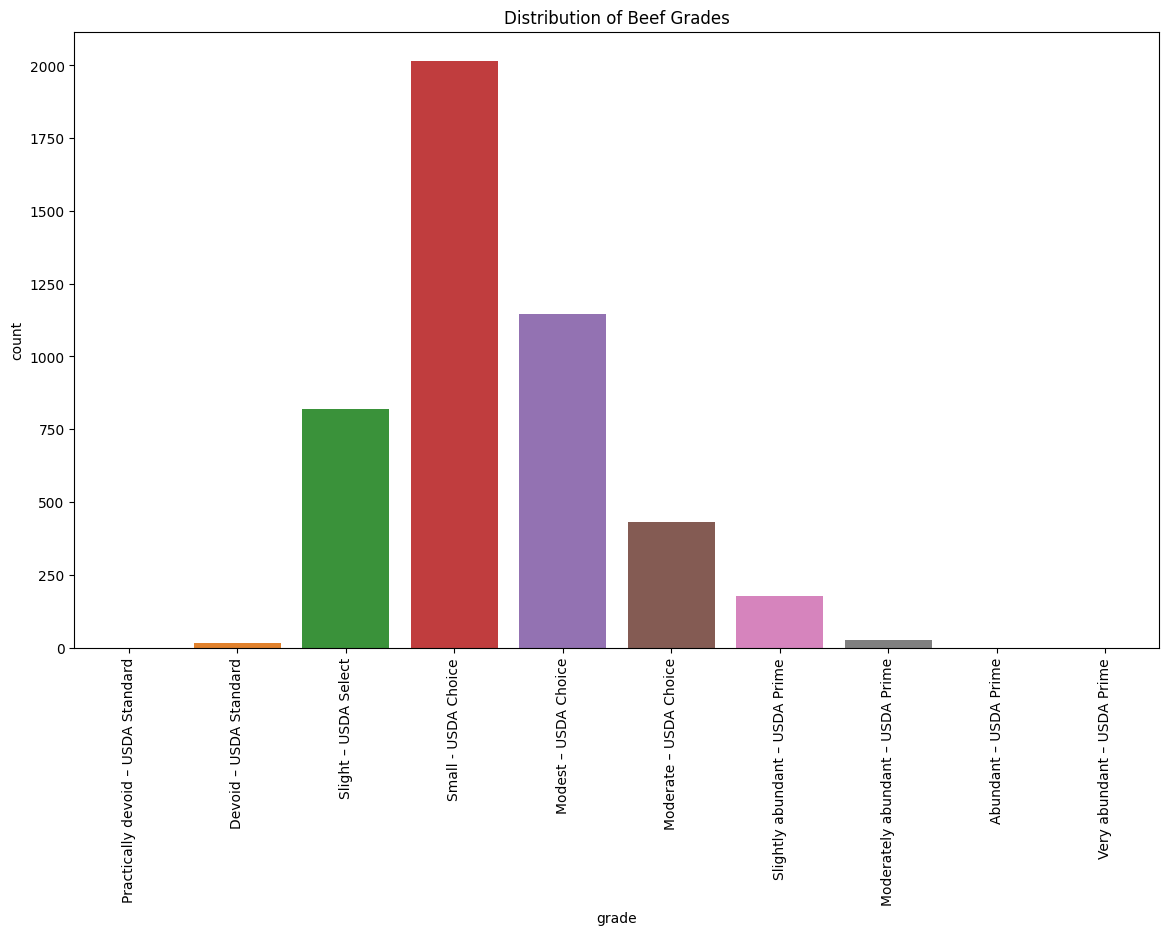

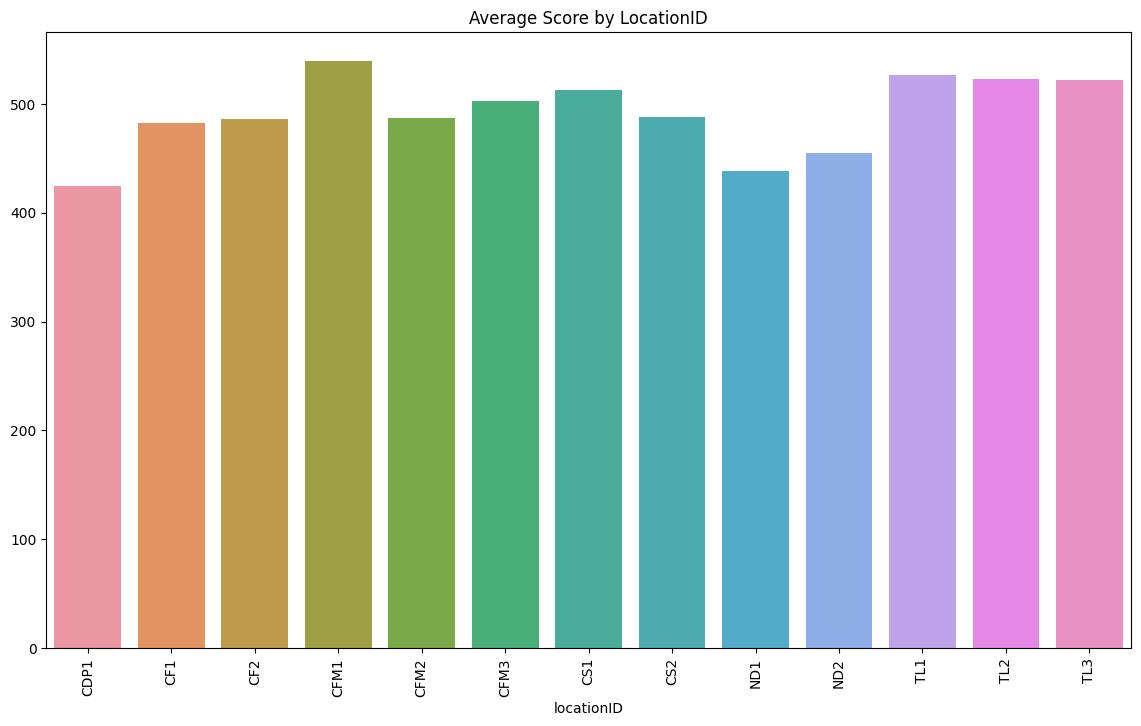

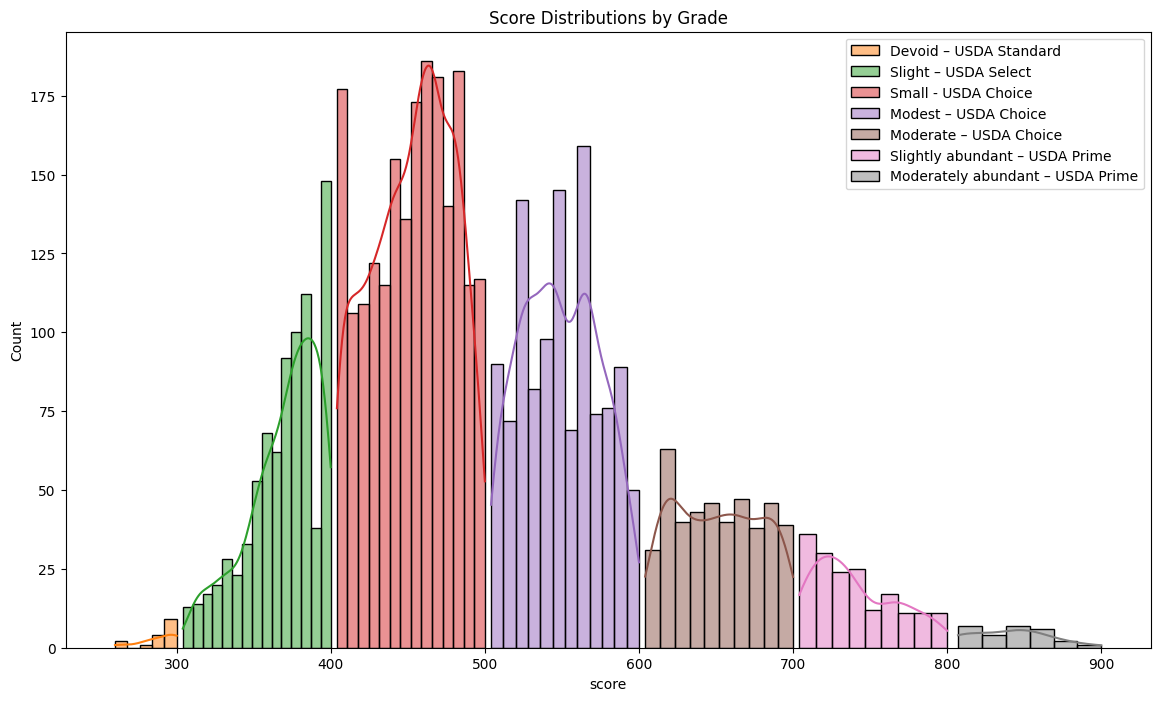

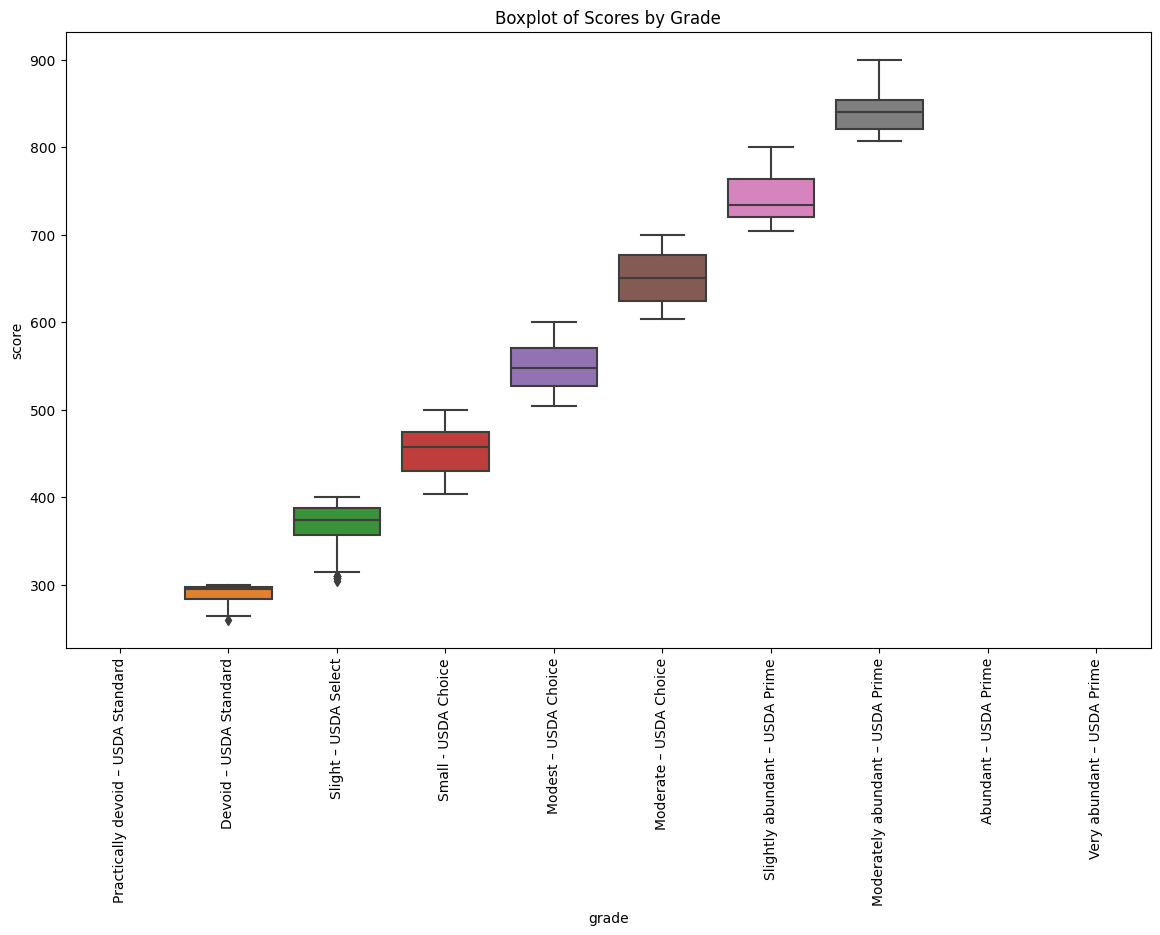

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['Practically devoid – USDA Standard', 'Devoid – USDA Standard', 'Slight – USDA Select', 
          'Small - USDA Choice', 'Modest – USDA Choice', 'Moderate – USDA Choice', 
          'Slightly abundant – USDA Prime', 'Moderately abundant – USDA Prime', 
          'Abundant – USDA Prime', 'Very abundant – USDA Prime']

# Distribution of Grades
plt.figure(figsize=(14, 8))
sns.countplot(x='grade', data=scores_df, order=labels)
plt.title('Distribution of Beef Grades')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

# Average Score by LocationID
average_scores_by_location = scores_df.groupby('locationID')['score'].mean()
plt.figure(figsize=(14, 8))
sns.barplot(x=average_scores_by_location.index, y=average_scores_by_location.values)
plt.title('Average Score by LocationID')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

# Distribution of Scores by Grade
plt.figure(figsize=(14, 8))
for label in labels:
    sns.histplot(scores_df[scores_df['grade'] == label]['score'], kde=True, label=label)
plt.title('Score Distributions by Grade')
plt.legend()
plt.show()

# Boxplot of Scores by Grade
plt.figure(figsize=(14, 8))
sns.boxplot(x='grade', y='score', data=scores_df, order=labels)
plt.title('Boxplot of Scores by Grade')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()


- CDP1 = Cargill Dodge 07 20 22 Plant
- CDP1 = Cargill Dodge 07 20 22 USDA
- CFM1 = Cargill Fort Morgan 03 28 22 Plant
- CFM2 = Cargill Fort Morgan 05 12 22 Plant
- CFM3 = Cargill Fort Morgan 07 15 22 Plant
- CF1 = Cargill Friona 07 18 22 Plant
- CF2 = Cargill Friona 07 18 22 USDA
- CS1 = Cargill Schuyler 04 01 22 Plant
- CS2 = Cargill Schuyler 07 18 22 Plant
- ND1 = National Dodge 07 19 22 USDA
- ND2 = National Liberal 07 19 22 USDA
- TL1 = Tyson Lexington 03 23 21 Plant 1st camera
- TL2 = Tyson Lexington 03 23 21 Plant 2nd camera
- TL3 = Tyson Lexington 06 27 22 USDA

In [6]:
print(scores_df['score'].describe())

count    4635.000000
mean      493.074649
std       101.843580
min       260.000000
25%       420.000000
50%       474.000000
75%       550.000000
max       900.000000
Name: score, dtype: float64


## Score Variability by Grade: 

Compute the variance or standard deviation of scores within each grade. This could help we understand how consistent the scoring is within each grade.

In [7]:
print(scores_df.groupby('grade')['score'].std())

grade
Practically devoid – USDA Standard          NaN
Devoid – USDA Standard                12.841177
Slight – USDA Select                  23.277632
Small - USDA Choice                   26.455800
Modest – USDA Choice                  25.457147
Moderate – USDA Choice                28.352773
Slightly abundant – USDA Prime        27.069108
Moderately abundant – USDA Prime      25.489118
Abundant – USDA Prime                       NaN
Very abundant – USDA Prime                  NaN
Name: score, dtype: float64


In [8]:
scores_df

,score,locationID,carcassID,grade
0,540,ND2,1174,Modest – USDA Choice
1,427,CDP1,230,Small - USDA Choice
2,450,TL2,7594,Small - USDA Choice
3,577,TL1,7669,Modest – USDA Choice
4,574,CFM3,132758-1,Modest – USDA Choice
...,...,...,...,...
4630,687,TL1,7336,Moderate – USDA Choice
4631,497,CFM2,102856-2,Small - USDA Choice
4632,404,ND1,119,Small - USDA Choice
4633,447,TL3,300,Small - USDA Choice


# Write to new dataset

In [9]:
# write the newly created dataset to a csv file
scores_df.to_csv("scores_dataset.csv", index=False)


# Conduct further Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the process of visualizing and analyzing data to extract insights, find patterns, identify outliers, test assumptions, and check for random chance. Here are some interesting exploratory data analysis we can perform on our beef grade data:

1. **Distribution of Scores by Location:** We've already plotted the average score by location, but it might be interesting to look at the distribution of scores by location. You can use boxplots or histograms to do this.

2. **Number of Grades by Location:** We can find out the count of each grade in every location. This can give we insights into how grading varies between locations.

3. **Grade versus Score Correlation by Location:** Since our dataset has both scores and their corresponding grades, we could see if the grades and scores follow a particular pattern for each location. This could involve creating scatter plots of scores versus grades for each location.

4. **Outlier Detection:** We can look for any outliers in our scores and grades. Box plots, scatter plots, or even a z-score analysis can help with this. Outliers might represent errors, but they could also be significant and interesting results.

5. **Time Trend Analysis:** If our data has a time component (like the date of grading), we could analyze trends over time. Are scores and grades improving or getting worse? Are there seasonal trends?

6. **Association Rules:** If we have more features, for instance, the feed type or the breed of the cattle, we could use association rules to find out if there are any interesting relationships. For example, does a certain breed or feed type have a higher probability of achieving a particular grade?

Remember, the goal of EDA is to understand the data and its underlying structure, not to build models or make predictions. 


# Building a model

Building a model requires a dataset with multiple features (or independent variables) and a target (or dependent variable). From the given information, our dataset primarily consists of scores, locations, and the derived grade. 

We can certainly build a model based on these features if we have a specific goal in mind. Here are a few possibilities:

1. **Predicting the Grade:** If we want to predict the beef grade based on the score, we could use a classification model, since the grades are discrete categories. However, since the grade is directly derived from the score in our case, it might not be a very interesting or useful model.

2. **Predicting the Score:** If we have more data about each carcass (like its weight, age, breed, feed type, etc.), we could build a regression model to predict the score based on these factors.

3. **Location Analysis:** If we have more data related to locations (like the number of cattle, the type of facilities, the age of the facilities, etc.), we could analyze how these factors affect the score or grade.

4. **Time Series Prediction:** If we have time-series data (like the date when each carcass was graded), we could predict future scores or grades using time-series models like ARIMA or LSTM.

However, given our current dataset, it's quite limited to provide a meaningful model. Gathering more features about each carcass would enable more possibilities for model building. 

# standardizing the image size

This script iterates over every image in your directory, opens it, and updates IMG_SIZE to be the smaller of the image's dimensions if it's less than the current IMG_SIZE.

However, it's important to note that while this method ensures that IMG_SIZE will be small enough for all your images, it also means that IMG_SIZE is determined by the smallest image in your dataset. If that image is an outlier (i.e., significantly smaller than the rest), it might not be the most efficient size to use for training your model.

Another approach is to resize all your images to a standard size as part of your preprocessing pipeline. This would allow weto control IMG_SIZE more directly and ensure that it's appropriate for your model and computational resources.

In [9]:
import os
from PIL import Image

# The directory containing the images
dir_name = 'combined_scored_images'

# Get a list of all filenames in the directory
filenames = os.listdir(dir_name)

# Initialize IMG_SIZE with a very large number
IMG_SIZE = float('inf')

# Iterate through each filename
for filename in filenames:
    # Check if the file is an image
    if filename.endswith('.jpg'):
        # Open the image file
        with Image.open(os.path.join(dir_name, filename)) as img:
            width, height = img.size
            # Set IMG_SIZE to the smaller of the two dimensions if it's less than the current IMG_SIZE
            IMG_SIZE = min(IMG_SIZE, width, height)

print(f"IMG_SIZE: {IMG_SIZE}")


IMG_SIZE: 422


In [12]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

# Constants
IMG_SIZE = 422
BATCH_SIZE = 32
EPOCHS = 10

# The directory containing the images
dir_name = 'combined_scored_images'

# Define your model
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))  # Adjust number of neurons in final layer if necessary

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Custom generator function
def custom_generator(subset):
    while True:
        if subset == 'training':
            files = os.listdir(dir_name)[:int(0.8 * len(os.listdir(dir_name)))]  # first 80% of files
        elif subset == 'validation':
            files = os.listdir(dir_name)[int(0.8 * len(os.listdir(dir_name))):]  # last 20% of files
            
        batch_images = []
        batch_labels = []

        for filename in files:
            if filename.endswith('.jpg'):
                score = int(filename[:3])
                label = [0]*10
                label[score//100 - 1] = 1
                
                img = tf.keras.preprocessing.image.load_img(dir_name + '/' + filename, target_size=(IMG_SIZE, IMG_SIZE))
                img_array = tf.keras.preprocessing.image.img_to_array(img)
                
                batch_images.append(img_array)
                batch_labels.append(label)
                
                if len(batch_images) == BATCH_SIZE:
                    yield (np.array(batch_images), np.array(batch_labels))
                    batch_images = []
                    batch_labels = []

# Total number of images
num_images = len(os.listdir(dir_name))

# Steps per epoch for training and validation
steps_per_epoch = int(0.8 * num_images) // BATCH_SIZE
validation_steps = int(0.2 * num_images) // BATCH_SIZE

# Train the model
model.fit(custom_generator('training'), epochs=EPOCHS, 
          steps_per_epoch=steps_per_epoch,
          validation_data=custom_generator('validation'), 
          validation_steps=validation_steps)


Epoch 1/10


2023-06-12 08:17:32.873657: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


118/118 [==============================] - ETA: 0s - loss: 121.4189 - accuracy: 0.3665

2023-06-12 08:20:15.066593: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


118/118 [==============================] - 173s 1s/step - loss: 121.4189 - accuracy: 0.3665 - val_loss: 1.6804 - val_accuracy: 0.3772
Epoch 2/10
118/118 [==============================] - 179s 2s/step - loss: 1.5402 - accuracy: 0.4457 - val_loss: 1.6609 - val_accuracy: 0.3998
Epoch 3/10
118/118 [==============================] - 180s 2s/step - loss: 1.3187 - accuracy: 0.4981 - val_loss: 1.9039 - val_accuracy: 0.3664
Epoch 4/10
118/118 [==============================] - 181s 2s/step - loss: 1.1943 - accuracy: 0.5606 - val_loss: 1.6445 - val_accuracy: 0.3933
Epoch 5/10
118/118 [==============================] - 187s 2s/step - loss: 1.1572 - accuracy: 0.5792 - val_loss: 1.6542 - val_accuracy: 0.3836
Epoch 6/10
118/118 [==============================] - 191s 2s/step - loss: 0.9265 - accuracy: 0.6602 - val_loss: 1.7633 - val_accuracy: 0.3675
Epoch 7/10
118/118 [==============================] - 189s 2s/step - loss: 0.6511 - accuracy: 0.7617 - val_loss: 1.8706 - val_accuracy: 0.3491
Epoch 8/

The output we are seeing is the training progress and results of your image classification model for each epoch (iteration through the entire dataset). Let's break it down:

- Each `Epoch` line signifies a single pass through the entire training set. Our model was set to run for 10 epochs.

- The format `118/118 [==============================]` signifies the completion of training steps in that particular epoch. Here, we had 118 steps per epoch and all are completed as shown by the filled brackets.

- `loss` and `accuracy` are metrics calculated on the training dataset. Loss is a measure of error and accuracy is the proportion of correctly classified images. Ideally, we want the loss to go down and accuracy to go up with each epoch. From the first to the ninth epoch, loss reduced from 121.4189 to 0.3933 and accuracy increased from 0.3665 to 0.8610, indicating the model is learning.

- `val_loss` and `val_accuracy` are the same metrics but calculated on the validation dataset, a subset of the data not used for training. The purpose of these metrics is to see how well the model is generalizing to new data. Ideally, validation loss should decrease and validation accuracy increase, similar to the training metrics. However, in your output, validation loss is increasing and validation accuracy is not consistently improving, suggesting the model may be overfitting the training data.

- The numbers after `ETA` and before the next Epoch represent the time taken to complete that epoch. The model took varying amounts of time, from a few minutes (173 seconds) to over half an hour (1666 seconds), to complete each epoch.

- The `INVALID_ARGUMENT` messages suggest there's an issue with feeding data to the model. It's not directly affecting the training process here but ideally, weshould look into this to avoid potential issues.

Keep in mind, the results are specific to this run of the model and can vary if the model is re-run or parameters are changed.

We can deploy your trained model on AWS using Amazon SageMaker. SageMaker allows we to host models and make predictions in the cloud.

To do so, we first need to save your trained model in the TensorFlow SavedModel format, which creates a protobuf file in a well-defined directory hierarchy, and also saves the TensorFlow checkpoint files. Here's how we do it:

In [13]:
# save the model in TensorFlow SavedModel format
model.save('my_model')


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


In [13]:
# use this to load the model back into the notebook

import tensorflow as tf

# Load the model from the directory it was saved in
model = tf.keras.models.load_model('my_model')

# Now we can use loaded_model to make predictions, just like the original model


This creates a directory named my_model and stores the model there.

Next, we would need to upload this model to an S3 bucket:

In [14]:
#import boto3
#import sagemaker

#sagemaker_session = sagemaker.Session()

#bucket = sagemaker_session.default_bucket()  # replace with your own bucket name if not using the default
#prefix = 'sagemaker/my_model'  # replace 'my_model' with your own preferred name

#model_artifact = sagemaker_session.upload_data(path='my_model', bucket=bucket, key_prefix=prefix)

#print('Model artifact saved at:', model_artifact)


You can now create a SageMaker model from the model artifact:

In [15]:
#from sagemaker.tensorflow import TensorFlowModel

#role = sagemaker.get_execution_role()  # replace with your own IAM role if not using the SageMaker default role

#sagemaker_model = TensorFlowModel(model_data=model_artifact, role=role, framework_version='2.1.0')


And finally, deploy this model to an endpoint:

In [16]:
# predictor = sagemaker_model.deploy(initial_instance_count=1, instance_type='ml.m5.large')


Now, we can use this predictor to make real-time predictions.

In [17]:
# Assume input_data is your input for prediction in the appropriate format
# result = predictor.predict(input_data)


Remember to replace 'ml.m5.large' with your preferred instance type based on your model's resource requirements and cost considerations.

Please note that we would need appropriate permissions for SageMaker to perform these operations. Also, be aware that hosting endpoints on SageMaker incurs cost for as long as they are running, so remember to shut them down when not in use.

In [18]:
# delete the endpoint when you're done
#predictor.delete_endpoint()


## The Model

The model is a type of convolutional neural network (CNN) that is typically used in image classification tasks.

Let's break down each line:

```python
# Define your model
model = Sequential()
```

The Sequential model is a linear stack of layers that we can create by passing a list of layer instances to the constructor. This means that we can create a CNN in a "stack-like" manner, where we first instantiate a Sequential model and then add layers to it one by one in a sequence.

```python
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
```

The first layer is a 2D convolution layer (Conv2D). This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. The first argument passed (32) is the number of filters that the convolutional layers will learn from. The kernel_size parameter denotes the height and width of the 2D convolution window. The activation function is 'relu' or rectified linear activation. The input_shape is the shape of the input (in this case, images).

```python
model.add(MaxPooling2D(pool_size=(2, 2)))
```

The max pooling layer (MaxPooling2D) is used to down-sample the input along its spatial dimensions (height and width). This reduces the computational cost by reducing the number of parameters to learn and provides basic translation invariance to the internal representation.

```python
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
```

Here, another convolutional layer and max pooling layer are added to the model. The first layer has 64 filters.

```python
model.add(Flatten())
```

This layer flattens the tensor output of the previous layer to a 1D tensor. This flattened output is fed to the next layer.

```python
model.add(Dense(10, activation='softmax'))  # Adjust number of neurons in final layer if necessary
```

The dense layer is the regular deeply connected neural network layer. It's most common and frequently used layer. Dense layer does the below operation on the input and returns the output.

`output = activation(dot(input, kernel) + bias)`

The first argument is the output size. In this case, we are using 10, which should match the number of classes in the classification task. The activation function used here is 'softmax', which makes the output sum up to 1 so the output can be interpreted as probabilities. The model will then make its prediction based on which option has the highest probability.

```python
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
```

The model is compiled with the Adam optimizer, a popular choice for training deep learning models. The loss function is set as 'categorical_crossentropy', which is appropriate for multiclass classification problems. The metrics to be evaluated by the model during training and testing are set as 'accuracy'.

The model is then trained using the fit method on the data generator. The data generator generates batches of tensor image data with real-time data augmentation. The data will be looped over in batches indefinitely.

During training, the model's weights are updated to minimize the loss function, and the accuracy of the classification is calculated as the percentage of correct predictions out of all predictions. These two values (loss and accuracy) are calculated for both the training data and the validation data.

After the model has been trained, it can be used to predict the class of unseen



## Let's take 100 random test images

Let's copy 100 random images and put into our test_images folder and then we'll see how well our classifier identifies the images correctly.



In [21]:
import os
import shutil
import random

# The source directory containing the images
source_dir = 'combined_scored_images'
# The destination directory
dest_dir = 'test_images'

# Create the destination directory if it doesn't exist
os.makedirs(dest_dir, exist_ok=True)

# Get a list of all filenames in the source directory
filenames = os.listdir(source_dir)

# Randomly choose 100 files
selected_files = random.sample(filenames, 100)

# Move the selected files to the destination directory
for filename in selected_files:
    # Check if the file is an image
    if filename.endswith('.jpg'):
        # Construct the full file paths
        src_filepath = os.path.join(source_dir, filename)
        dest_filepath = os.path.join(dest_dir, filename)
        # Move the file
        shutil.move(src_filepath, dest_filepath)

print("Moved 100 images to 'test_images' folder.")


Moved 100 images to 'test_images' folder.


To use the trained model to predict on new images and calculate the loss, you'll need to preprocess the images in the same way they were preprocessed during training. Then, we can use the model's `predict` method to get the model's predictions. Let's say we have a new set of images in a directory called 'new_images'. Here's how we might do it:

In [23]:
pip install --upgrade keras

Note: you may need to restart the kernel to use updated packages.


In [14]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.losses import CategoricalCrossentropy
import numpy as np
import os

# The directory containing the test images
dir_name = 'test_images'

# Initialize a CategoricalCrossentropy loss function
loss_fn = CategoricalCrossentropy()

# Get a list of all filenames in the directory
filenames = os.listdir(dir_name)

# Initialize an empty list for losses
losses = []

# Iterate through each filename
for filename in filenames:
    # Check if the file is an image
    if filename.endswith('.jpg'):
        # Load the image
        img = load_img(os.path.join(dir_name, filename), target_size=(IMG_SIZE, IMG_SIZE))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)

        # Get the true label
        score = int(filename[:3])
        true_label = [0]*10
        true_label[score//100 - 1] = 1
        true_label = np.array(true_label)
        true_label = np.expand_dims(true_label, axis=0)

        # Get the predicted probabilities
        pred_probs = model.predict(img_array)

        # Compute the loss
        loss = loss_fn(true_label, pred_probs).numpy()

        # Add the loss to the list
        losses.append(loss)

# Compute the average loss
avg_loss = np.mean(losses)

print(f"Average loss: {avg_loss}")


1/1 [==============================] - 0s 28ms/step
Average loss: 1.3382495641708374


This code iterates over all the images in the 'new_images' directory, resizes them to the correct size, and then feeds them into the model to get a prediction for each one. It also calculates the actual labels based on the filenames. Then it calculates the categorical cross entropy loss between the actual labels and the predicted labels.

In [41]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import random
import os

# Load the model from the directory it was saved in
loaded_model = tf.keras.models.load_model('my_model')

dir_name = 'combined_scored_images'

# Select a random image from the directory
random_filename = random.choice([
    x for x in os.listdir(dir_name)
    if os.path.isfile(os.path.join(dir_name, x))
])

# Load the image
img = load_img(os.path.join(dir_name, random_filename), target_size=(422, 422))

# Convert the image to a numpy array and reshape it
img_array = img_to_array(img)
img_array = img_array.reshape(1, 422, 422, 3)

# Use the loaded model to make a prediction
prediction = loaded_model.predict(img_array)

# Print the prediction
print(f"Predicted class for {random_filename} is: {prediction.argmax() + 1}")

# Print the actual class
print(f"Actual class for {random_filename} is: {int(random_filename[:3]) // 100}")


1/1 [==============================] - 0s 58ms/step
Predicted class for 367_CS1_310409-2.jpg is: 4
Actual class for 367_CS1_310409-2.jpg is: 3


In [42]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import random
import os

# Load the model from the directory it was saved in
loaded_model = tf.keras.models.load_model('my_20_epoch_model')

dir_name = 'combined_scored_images'

# Select a random image from the directory
random_filename = random.choice([
    x for x in os.listdir(dir_name)
    if os.path.isfile(os.path.join(dir_name, x))
])

# Load the image
img = load_img(os.path.join(dir_name, random_filename), target_size=(422, 422))

# Convert the image to a numpy array and reshape it
img_array = img_to_array(img)
img_array = img_array.reshape(1, 422, 422, 3)

# Use the loaded model to make a prediction
prediction = loaded_model.predict(img_array)

# Print the prediction
print(f"Predicted class for {random_filename} is: {prediction.argmax() + 1}")

# Print the actual class
print(f"Actual class for {random_filename} is: {int(random_filename[:3]) // 100}")


1/1 [==============================] - 0s 61ms/step
Predicted class for 480_TL1_7240.jpg is: 4
Actual class for 480_TL1_7240.jpg is: 4


In [30]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.losses import CategoricalCrossentropy
import random
import os

# Load the model from the directory it was saved in
loaded_model = tf.keras.models.load_model('my_model')

dir_name = 'combined_scored_images'

# Initialize the loss function
loss_fn = CategoricalCrossentropy()

# Select 100 random images from the directory
random_filenames = random.sample([
    x for x in os.listdir(dir_name)
    if os.path.isfile(os.path.join(dir_name, x))
], 100)

# Initialize an array to store the losses
losses = []

# Iterate over the filenames
for filename in random_filenames:
    # Load the image
    img = load_img(os.path.join(dir_name, filename), target_size=(422, 422))

    # Convert the image to a numpy array and reshape it
    img_array = img_to_array(img)
    img_array = img_array.reshape(1, 422, 422, 3)

    # Use the loaded model to make a prediction
    prediction = loaded_model.predict(img_array)
    
    # Create the actual score in the format used for training
    actual_score = int(filename[:3])
    actual_score_one_hot = [0]*10
    actual_score_one_hot[actual_score//100 - 1] = 1
    actual_score_one_hot = np.array(actual_score_one_hot).reshape(1, 10)

    # Calculate the loss for this image
    loss = loss_fn(actual_score_one_hot, prediction).numpy()
    
    # Append the loss to the losses array
    losses.append(loss)

# Calculate and print the average loss
average_loss = np.mean(losses)
print(f"Average loss: {average_loss}")


1/1 [==============================] - 0s 33ms/step
Average loss: 0.9394815564155579


The average loss value that you've got, which is 0.939 in this case, is a measure of how well your model performs across the chosen set of test images. Specifically, it's an average of the categorical cross-entropy losses calculated for each of the images.

In the context of categorical cross-entropy, the loss measures the dissimilarity between the predicted probability distribution output by the model and the actual distribution of the classes. In this case, your classes are marbling scores from 260 to 900.

A lower loss indicates that the model's predictions are closer to the actual values, i.e., the model is performing well. A higher loss indicates that the model's predictions are less accurate, i.e., the model isn't performing as well.

The value of 0.939 itself doesn't provide much interpretable information unless it's compared with some benchmarks or other models. For example, we could train multiple models or the same model with different parameters, and compare their average losses on the same test set. The model with the lowest average loss would be the best one among them.

Do note that, for the categorical cross-entropy loss, the value is not bounded above by 1. It can take any positive value, and perfect predictions would result in a loss of 0. Therefore, while an average loss of 0.939 indicates that there is some difference between the model's predictions and the actual labels, without additional context, it's hard to definitively say whether this is good or bad.

Epoch 1/20


2023-06-12 17:35:27.460853: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


115/115 [==============================] - ETA: 0s - loss: 178.8764 - accuracy: 0.3481

2023-06-12 17:38:21.974737: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


115/115 [==============================] - 185s 2s/step - loss: 178.8764 - accuracy: 0.3481 - val_loss: 1.5296 - val_accuracy: 0.4085
Epoch 2/20
115/115 [==============================] - 191s 2s/step - loss: 1.1493 - accuracy: 0.5530 - val_loss: 1.6256 - val_accuracy: 0.3638
Epoch 3/20
115/115 [==============================] - 194s 2s/step - loss: 0.8072 - accuracy: 0.7060 - val_loss: 1.7570 - val_accuracy: 0.3214
Epoch 4/20
115/115 [==============================] - 200s 2s/step - loss: 0.7845 - accuracy: 0.7185 - val_loss: 2.0292 - val_accuracy: 0.3058
Epoch 5/20
115/115 [==============================] - 205s 2s/step - loss: 0.6776 - accuracy: 0.7584 - val_loss: 2.6646 - val_accuracy: 0.2980
Epoch 6/20
115/115 [==============================] - 204s 2s/step - loss: 0.6503 - accuracy: 0.7761 - val_loss: 2.9542 - val_accuracy: 0.3136
Epoch 7/20
115/115 [==============================] - 202s 2s/step - loss: 0.5377 - accuracy: 0.8323 - val_loss: 3.0682 - val_accuracy: 0.3047
Epoch 8/

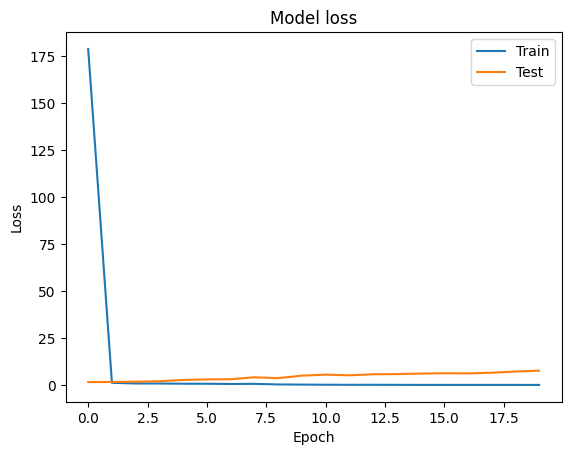

In [31]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

# Constants
IMG_SIZE = 422
BATCH_SIZE = 32
EPOCHS = 20

# The directory containing the images
dir_name = 'combined_scored_images'

# Define your model
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))  # Adjust number of neurons in final layer if necessary

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Custom generator function
def custom_generator(subset):
    while True:
        if subset == 'training':
            files = os.listdir(dir_name)[:int(0.8 * len(os.listdir(dir_name)))]  # first 80% of files
        elif subset == 'validation':
            files = os.listdir(dir_name)[int(0.8 * len(os.listdir(dir_name))):]  # last 20% of files
            
        batch_images = []
        batch_labels = []

        for filename in files:
            if filename.endswith('.jpg'):
                score = int(filename[:3])
                label = [0]*10
                label[score//100 - 1] = 1
                
                img = tf.keras.preprocessing.image.load_img(dir_name + '/' + filename, target_size=(IMG_SIZE, IMG_SIZE))
                img_array = tf.keras.preprocessing.image.img_to_array(img)
                
                batch_images.append(img_array)
                batch_labels.append(label)
                
                if len(batch_images) == BATCH_SIZE:
                    yield (np.array(batch_images), np.array(batch_labels))
                    batch_images = []
                    batch_labels = []

# Total number of images
num_images = len(os.listdir(dir_name))

# Steps per epoch for training and validation
steps_per_epoch = int(0.8 * num_images) // BATCH_SIZE
validation_steps = int(0.2 * num_images) // BATCH_SIZE

# Train the model and store the history
history = model.fit(custom_generator('training'), epochs=EPOCHS, 
                    steps_per_epoch=steps_per_epoch,
                    validation_data=custom_generator('validation'), 
                    validation_steps=validation_steps)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


In [32]:
# save the model in TensorFlow SavedModel format
model.save('my_20_epoch_model')

INFO:tensorflow:Assets written to: my_20_epoch_model/assets


INFO:tensorflow:Assets written to: my_20_epoch_model/assets


In [ ]:
# use this to load the model back into the notebook

import tensorflow as tf

# Load the the 20 epoch model from the directory it was saved in
model = tf.keras.models.load_model('my_20_epoch_model')

# Now we can use loaded_model to make predictions, just like the original model